In [1]:
import numpy as np
from matplotlib import pyplot as plt

<Figure size 288x216 with 0 Axes>

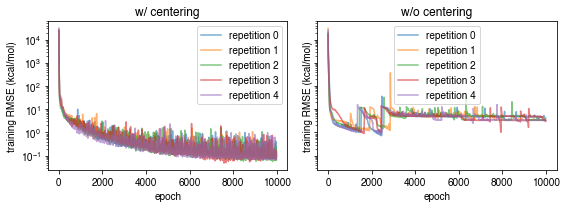

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
plt.figure(figsize=(4,3 ))

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

for idx in range(5):
    for part in ['te']:
        x = np.load(
                "%s_%s_0.npy" % (idx, part)
        )[::10]
        
        axs[0].plot(
            np.arange(0, 10000, 10),
            x,
            alpha=0.6,
            label="repetition %s" % idx,
        )
    axs[0].set_yscale("log")
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("training RMSE (kcal/mol)")
    axs[0].legend()
    axs[0].set_title("w/ centering")
    
for idx in range(5):
    for part in ['te']:
        x = np.load(
                "../opt_traj_no_center/%s_%s_0.npy" % (idx, part)
        )[::10]
        
        axs[1].plot(
            np.arange(0, 10000, 10),
            x,
            alpha=0.6,
            label="repetition %s" % idx,
        )
    axs[1].set_yscale("log")
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("training RMSE (kcal/mol)")
    axs[1].legend()
    axs[1].set_title("w/o centering")

plt.tight_layout()
plt.savefig("train_traj.png", dpi=300)


In [3]:
for idx in range(5):
    rmse_vl = np.load("%s_%s_0.npy" % (idx, "vl"))
    rmse_tr = np.load("%s_%s_0.npy" % (idx, "tr"))
    rmse_te = np.load("%s_%s_0.npy" % (idx, "te"))
    
    rmse_vl_ = np.load("../opt_traj_no_center/%s_%s_0.npy" % (idx, "vl"))
    rmse_tr_ = np.load("../opt_traj_no_center/%s_%s_0.npy" % (idx, "tr"))
    rmse_te_ = np.load("../opt_traj_no_center/%s_%s_0.npy" % (idx, "te"))
    
    print(" & ".join([
        str(idx),
        str(rmse_vl.argmin()),
        "%.4f" % rmse_tr[rmse_vl.argmin()],
        "%.4f" % rmse_vl[rmse_vl.argmin()],
        "%.4f" % rmse_te[rmse_vl.argmin()],
        str(idx),
        str(rmse_vl_.argmin()),
        "%.4f" % rmse_tr_[rmse_vl_.argmin()],
        "%.4f" % rmse_vl_[rmse_vl_.argmin()],
        "%.4f" % rmse_te_[rmse_vl_.argmin()],
        "\\" "\\"
    ]))

0 & 9602 & 0.0456 & 0.0523 & 0.0834 & 0 & 2447 & 0.7331 & 0.6937 & 0.7705 & \\
1 & 8938 & 0.0381 & 0.0500 & 0.0815 & 1 & 1902 & 1.2449 & 1.1950 & 1.1910 & \\
2 & 9967 & 0.0438 & 0.0503 & 0.0545 & 2 & 1424 & 1.1646 & 1.1351 & 1.1537 & \\
3 & 9696 & 0.0411 & 0.0342 & 0.0714 & 3 & 2422 & 0.9849 & 0.9121 & 0.9805 & \\
4 & 9879 & 0.0377 & 0.0470 & 0.0714 & 4 & 2446 & 0.8727 & 0.8006 & 0.8460 & \\
